<a href="https://colab.research.google.com/github/AyA-EhaB/FEDIS_Tasks/blob/main/Linear_Regression_from_Scratch_Energy_Efficiency_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resources
- https://www.kaggle.com/code/vishwaaradhyamath/energyefficient-eda-regression-ipynb?utm_source=chatgpt.com
- https://medium.com/%40karthikayanmailsamy/simplified-explanation-on-implementing-linear-regression-using-energy-efficiency-of-buildings-14d866de8f60
- https://github.com/thevirengarg/Energy-Efficiency-Regression-Analysis-Project/blob/main/Energy%20Efficiency.ipynb

## Understanding the Dataset

This dataset contains 768 samples and 8 input features, aimed at predicting two continuous responses—heating load and cooling load

## Inputs (X1 to X8)

These are building design characteristics that influence how much heating or cooling the building will need.

| Feature | Name                          | Explanation                                                                                                                                                                                                                        |
| ------- | ----------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **X1**  | **Relative Compactness**      | A ratio describing how compact the building shape is compared to a cube of the same volume. Higher values (close to 1) mean a more compact building with less surface area exposed, which reduces heat loss/gain.                  |
| **X2**  | **Surface Area**              | The total exterior surface area (walls, roof, floor) of the building in square meters. Larger surface area increases potential heat transfer between inside and outside.                                                           |
| **X3**  | **Wall Area**                 | The total area of all exterior walls in square meters. Walls are a major path for heat to escape or enter, depending on insulation quality and outside temperature.                                                                |
| **X4**  | **Roof Area**                 | The total roof area in square meters. Roofs are often significant points of heat gain in hot weather and heat loss in cold weather.                                                                                                |
| **X5**  | **Overall Height**            | The vertical height of the building from the ground to the roof in meters. Height affects airflow patterns and the distribution of heating/cooling loads.                                                                          |
| **X6**  | **Orientation**               | The compass direction the building faces, coded as integers (2 = North, 3 = East, 4 = South, 5 = West). Orientation affects sunlight exposure and therefore heating/cooling needs.                                                 |
| **X7**  | **Glazing Area**              | The fraction of the building’s exterior that consists of windows (glass surfaces). Higher glazing area increases daylight but also affects thermal performance due to glass heat transfer.                                         |
| **X8**  | **Glazing Area Distribution** | Describes how the glass (windows) is distributed around the building: 0 = none, 1 = one side, 2 = two sides, 3 = three sides, 4 = four sides (all around). The placement of glazing impacts sunlight exposure and thermal balance. |


## Outputs (Targets)

#### Heating Load (Y1)
How much energy (in kWh/m²) is needed to keep the building warm during cold weather.
Lower is better (more energy efficient in winter).

#### Cooling Load (Y2)
How much energy (in kWh/m²) is needed to keep the building cool during hot weather.
Lower is better (more energy efficient in summer).

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elikplim/eergy-efficiency-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.22k/6.22k [00:00<00:00, 8.21MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/eergy-efficiency-dataset/versions/1


In [4]:
import numpy as np
import pandas as pd


In [5]:
import os

# List files in the downloaded directory
directory_path = "/root/.cache/kagglehub/datasets/elikplim/eergy-efficiency-dataset/versions/1"
files_in_directory = os.listdir(directory_path)

print("Files in the directory:", files_in_directory)

Files in the directory: ['ENB2012_data.csv']


In [7]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/elikplim/eergy-efficiency-dataset/versions/1/ENB2012_data.csv")

In [8]:
display(df.head())

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
df.shape

(768, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [11]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


- no missing values


In [12]:
df.isna().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


In [13]:
df.rename(columns={'X1':'Relative Compactness','X2':'Surface Area','X3':'Wall Area','X4':'Roof Area','X5':'Overall Height','X6':'Orientation','X7':'Glazing Area','X8':'Glazing Area Distribution','Y1':'Heating Load','Y2':'Cooling Load'}, inplace = True)

In [14]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [15]:
(df==0).any()

,0
Relative Compactness,False
Surface Area,False
Wall Area,False
Roof Area,False
Overall Height,False
Orientation,False
Glazing Area,True
Glazing Area Distribution,True
Heating Load,False
Cooling Load,False


In [16]:
df["Glazing Area"].value_counts()

,count
Glazing Area,
0.10,240
0.25,240
0.40,240
0.00,48


In [17]:
df["Glazing Area Distribution"].value_counts()

,count
Glazing Area Distribution,
1,144
2,144
4,144
3,144
5,144
0,48


In [18]:
(df<0).any()

,0
Relative Compactness,False
Surface Area,False
Wall Area,False
Roof Area,False
Overall Height,False
Orientation,False
Glazing Area,False
Glazing Area Distribution,False
Heating Load,False
Cooling Load,False


## **KDE**

* **KDE (Kernel Density Estimate)** creates a smooth curve over the histogram to estimate the probability distribution of a variable.
* It helps:

  1. **Visualize the shape** of the distribution (normal, skewed, bimodal, etc.).
  2. **Detect skewness** and whether the data is symmetric.
  3. **Identify discrete vs continuous patterns** more clearly than raw histograms.
  4. **Spot anomalies or multimodal behavior** (multiple peaks).

---

## **Distribution Shapes**

* **Unimodal** — one clear peak (e.g., human heights in a single population).
* **Bimodal** — two peaks (e.g., combined heights of men and women).
* **Multimodal** — three or more peaks (e.g., test scores from several different classes).

💡 Multiple peaks in KDE often mean your data is a mix of different groups.
You may need to:

* Separate the data into groups.
* Add a categorical feature to capture group differences.

---

## **Assumptions of Linear Regression (and why they matter)**

### **0. Residuals — the starting point**

* Residual = `Actual value – Predicted value`.
* Shows how far each prediction is from reality.

---

### **1. Linearity**

* The relationship between each predictor (X) and the target (y) should be roughly a straight line.
* **Check:** Scatterplot of each feature vs target should show a linear trend.

---

### **2. Independence of Errors**

* Residuals should be unrelated to each other.
* If errors are connected (e.g., a repeating pattern over time), the model is missing an important factor.
* **Example:** Predicting daily energy use — if errors grow every afternoon, you forgot to include “time of day” as a feature.

---

### **3. Homoscedasticity**

* Residuals should have equal spread for all predicted values.
* **Check:** Plot predicted values vs residuals — should look like random scatter.

**Why it’s bad when violated:**

* A **“cone shape”** (narrow at one end, wide at the other) means your model predicts **small values** more precisely than **large values** (or vice versa).
* In other words → **error variance is not constant**.
* This suggests predictions are biased for certain ranges.

---

### **4. Normality of Residuals**

* Residuals should form a bell curve (normal distribution) centered at zero.
* Means the model’s errors are random, not biased.
* **Check:** Histogram + KDE of residuals, or Q–Q plot.

---

### **5. No Multicollinearity**

* Predictors shouldn’t be too similar to each other.
* **Why:** If two features are almost the same (e.g., *Surface Area* and *Wall Area*), the model can’t decide which one matters more.
* **Check:** Correlation matrix or Variance Inflation Factor (VIF > 5 or 10 = high multicollinearity).


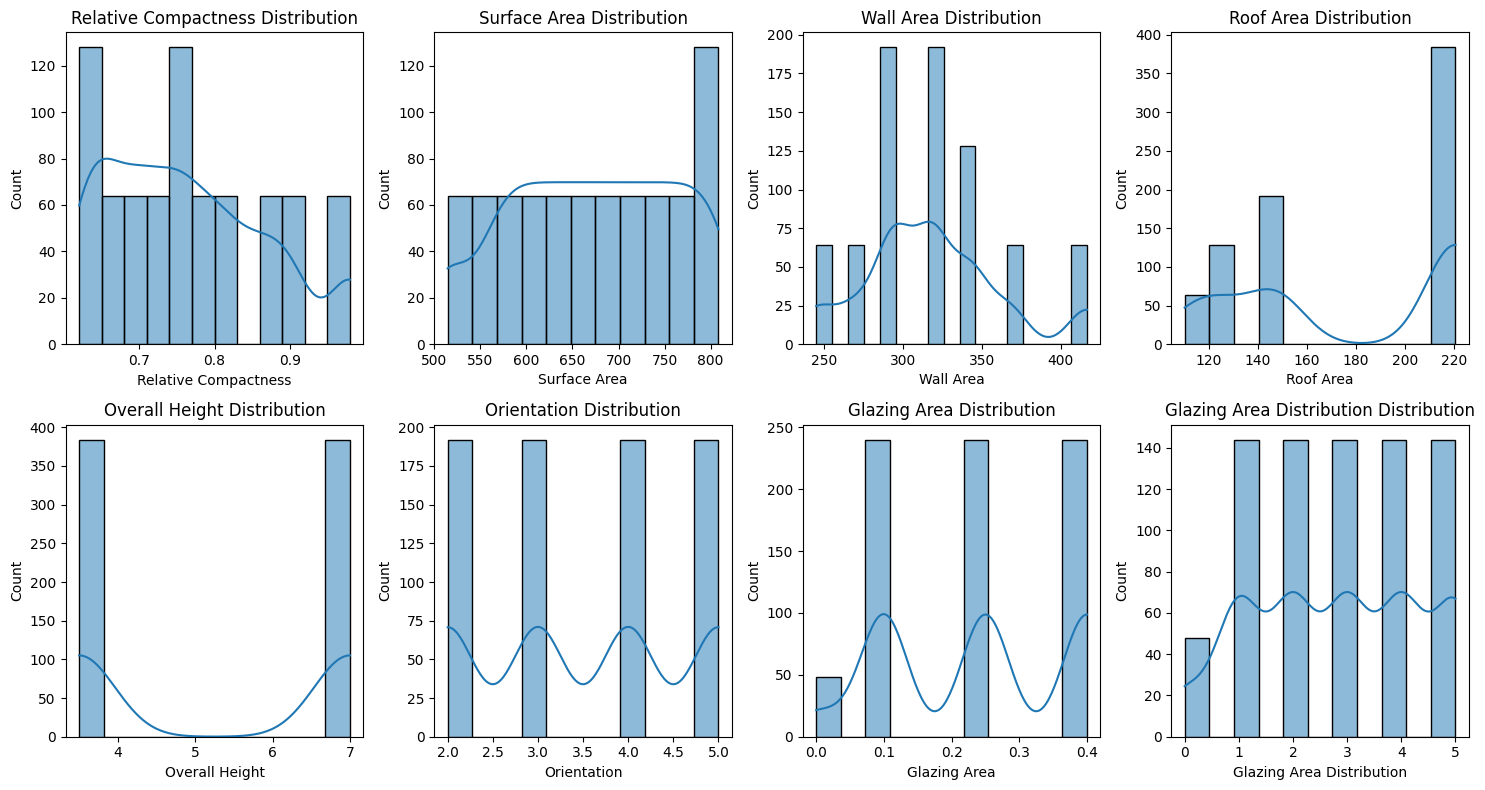

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot (all except last 2)
features = df.columns[:-2]

# Decide subplot grid size
n_cols = 4
n_rows = 2

# Create one big figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

# Loop through features and plot on each subplot
for idx, col in enumerate(features):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()


- **Continuous & normal:** Relative Compactness, Surface Area → can scale normally.

- **Multimodal/Bimodal:** Wall Area, Roof Area, Overall Height → might represent subgroups; check before modeling.

- **Discrete/Categorical:** Orientation, Glazing Area, Glazing Area Distribution → must be encoded before linear regression.

# Skewness

In [20]:
from scipy.stats import skew
for i in features:
  column_skew = skew(df[i])
  print(i,":",column_skew)

Relative Compactness : 0.4945441823526014
Surface Area : -0.12488635574227028
Wall Area : 0.5323750928990681
Roof Area : -0.16244592674971672
Overall Height : 0.0
Orientation : 0.0
Glazing Area : -0.060136480707452804
Glazing Area Distribution : -0.08851586032816593


- Relative Compactness & Wall Area are mild right Skewed

In [21]:
df['Relative Compactness'].describe()

,Relative Compactness
count,768.000000
mean,0.764167
std,0.105777
min,0.620000
25%,0.682500
50%,0.750000
75%,0.830000
max,0.980000


In [22]:
df['Wall Area'].describe()

,Wall Area
count,768.000000
mean,318.500000
std,43.626481
min,245.000000
25%,294.000000
50%,318.500000
75%,343.000000
max,416.500000


## Square Root (√) vs. Log

| Feature                  | Skew                   | Value Range        | Transformation | Why                                                                       |
| ------------------------ | ---------------------- | ------------------ | -------------- | ------------------------------------------------------------------------- |
| **Relative Compactness** | 0.49 (mild right skew) | 0.62–0.98 (narrow) | **√**          | Gentle correction, avoids over-compression, values already close together |
| **Wall Area**            | 0.53 (mild right skew) | 245–416.5 (wider)  | **log**        | Compresses wider spread, balances influence, all positive values          |


0.39046989341862925
count    768.000000
mean       0.872121
std        0.059808
min        0.787401
25%        0.826098
50%        0.866006
75%        0.910994
max        0.989949
Name: Relative Compactness, dtype: float64


<Axes: xlabel='Relative Compactness', ylabel='Count'>

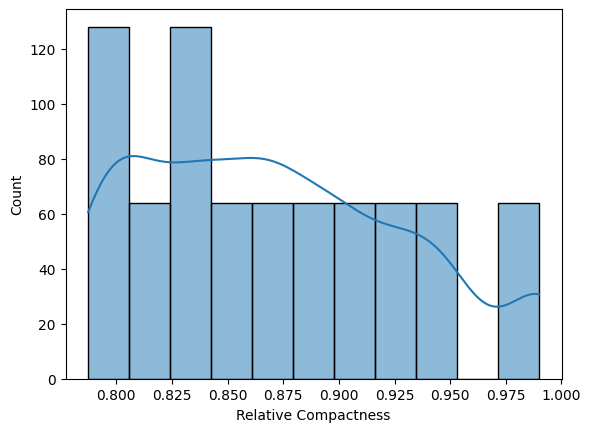

In [23]:
df['Relative Compactness'] = np.sqrt(df['Relative Compactness'])
print(skew(df['Relative Compactness']))
print(df['Relative Compactness'].describe())
sns.histplot(data = df, x= "Relative Compactness",kde =True)

0.163024969656773
count    768.000000
mean       5.754459
std        0.134990
min        5.501258
25%        5.683580
50%        5.763622
75%        5.837730
max        6.031886
Name: Wall Area, dtype: float64


<Axes: xlabel='Wall Area', ylabel='Count'>

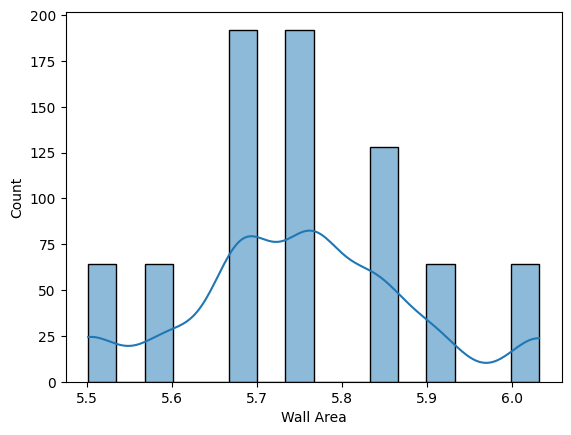

In [24]:
df['Wall Area'] = np.log(df['Wall Area'])
print(skew(df['Wall Area']))
print(df['Wall Area'].describe())
sns.histplot(data = df, x= 'Wall Area',kde =True)

# Outlier

In [25]:
def find_outliers(df, variable):
  IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
  L = df[variable].quantile(0.25) - IQR *1.5
  U = df[variable].quantile(0.75) + IQR *1.5
  return U,L

In [26]:
out_lier ={}
for c in df.columns :
  u,l = find_outliers(df,c)
  out = df[(df[c]<l)|(df[c]>u)][c]
  out_lier[c]={
      "upper":u,
      "lower":l,
      "num_outliers":len(out),
      "outliers_percent":100*(out.count())/len(df)
  }
print(out_lier)

{'Relative Compactness': {'upper': np.float64(1.0383392446171151), 'lower': np.float64(0.6987528529653382), 'num_outliers': 0, 'outliers_percent': np.float64(0.0)}, 'Surface Area': {'upper': np.float64(943.25), 'lower': np.float64(404.25), 'num_outliers': 0, 'outliers_percent': np.float64(0.0)}, 'Wall Area': {'upper': np.float64(6.068956466906826), 'lower': np.float64(5.452353747597794), 'num_outliers': 0, 'outliers_percent': np.float64(0.0)}, 'Roof Area': {'upper': np.float64(339.9375), 'lower': np.float64(21.4375), 'num_outliers': 0, 'outliers_percent': np.float64(0.0)}, 'Overall Height': {'upper': np.float64(12.25), 'lower': np.float64(-1.75), 'num_outliers': 0, 'outliers_percent': np.float64(0.0)}, 'Orientation': {'upper': np.float64(6.5), 'lower': np.float64(0.5), 'num_outliers': 0, 'outliers_percent': np.float64(0.0)}, 'Glazing Area': {'upper': np.float64(0.8500000000000001), 'lower': np.float64(-0.3500000000000001), 'num_outliers': 0, 'outliers_percent': np.float64(0.0)}, 'Glazi

In [27]:
outlier_df = pd.DataFrame(out_lier)
print(outlier_df)

                  Relative Compactness  Surface Area  Wall Area  Roof Area  \
upper                         1.038339        943.25   6.068956   339.9375   
lower                         0.698753        404.25   5.452354    21.4375   
num_outliers                  0.000000          0.00   0.000000     0.0000   
outliers_percent              0.000000          0.00   0.000000     0.0000   

                  Overall Height  Orientation  Glazing Area  \
upper                      12.25          6.5          0.85   
lower                      -1.75          0.5         -0.35   
num_outliers                0.00          0.0          0.00   
outliers_percent            0.00          0.0          0.00   

                  Glazing Area Distribution  Heating Load  Cooling Load  
upper                                 7.375         59.68      59.40125  
lower                                -1.625        -15.02     -10.64875  
num_outliers                          0.000          0.00       0.00000

- No outiers

# Correlation

<Axes: >

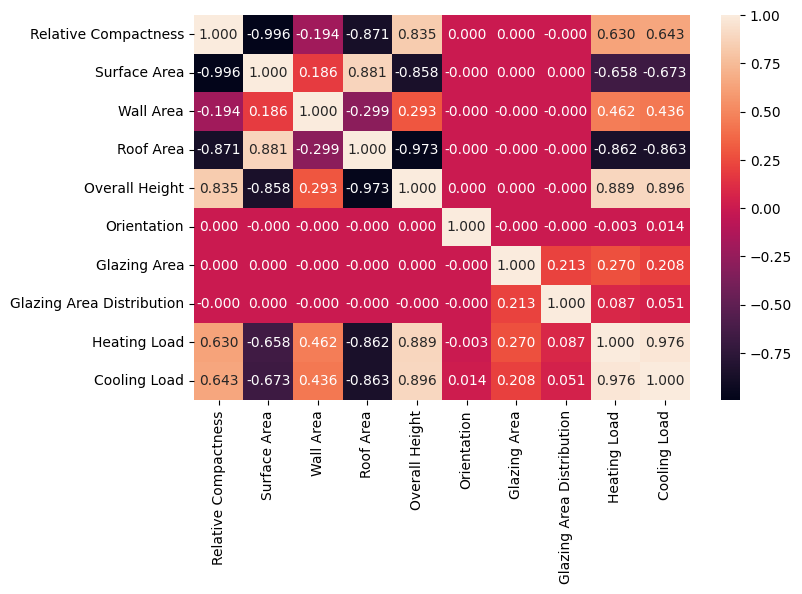

In [28]:
corr_df = df.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corr_df,annot=True,fmt ='.3f')


- i need to drop either Relative Compactness or Surface Area
and Roof Area or Overall Height

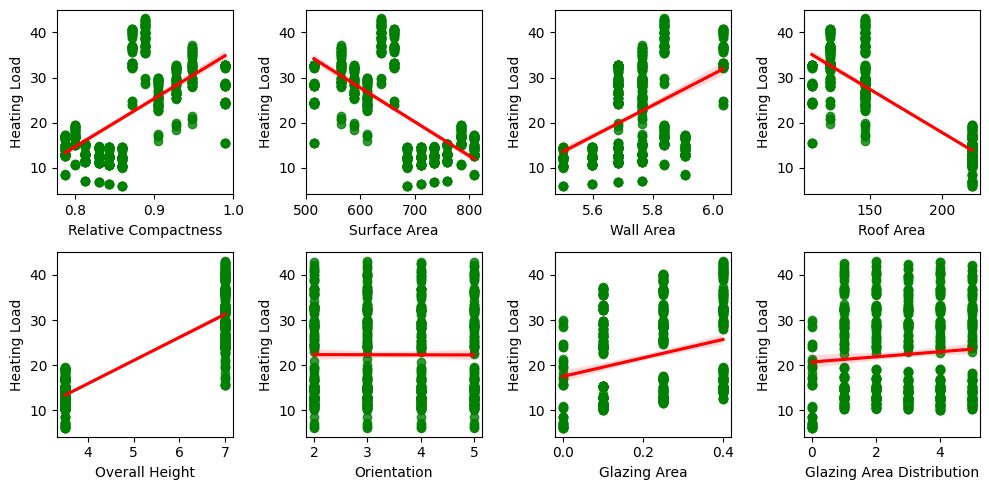

In [29]:
n_rows=2
n_cols=4

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
    sns.regplot(x=df[column], y=df['Heating Load'], ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:411: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, **kws)


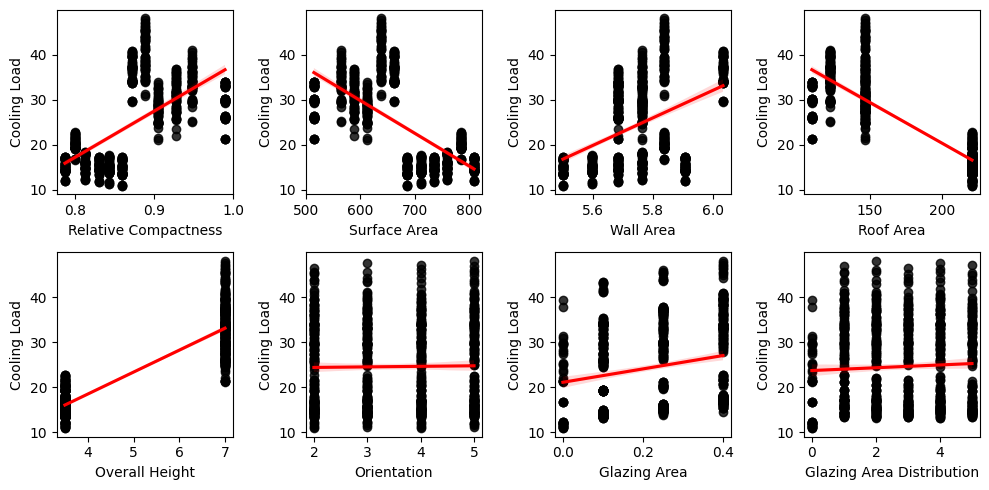

In [30]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
    sns.regplot(x = df[column], y = df['Cooling Load'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "black" , 'cmap':'jet'}, line_kws={"color": "red"})
plt.tight_layout()

In [31]:
# drop Surface Area, Roof Area, Orientation, Glazingg Area Distibution
df=df.drop('Surface Area', axis =1)
df=df.drop('Roof Area', axis =1)
df=df.drop('Glazing Area Distribution', axis =1)
df=df.drop('Orientation', axis =1)

In [32]:
df

,Relative Compactness,Wall Area,Overall Height,Glazing Area,Heating Load,Cooling Load
0,0.989949,5.683580,7.0,0.0,15.55,21.33
1,0.989949,5.683580,7.0,0.0,15.55,21.33
2,0.989949,5.683580,7.0,0.0,15.55,21.33
3,0.989949,5.683580,7.0,0.0,15.55,21.33
4,0.948683,5.763622,7.0,0.0,20.84,28.28
...,...,...,...,...,...,...
763,0.800000,5.837730,3.5,0.4,17.88,21.40
764,0.787401,5.906723,3.5,0.4,16.54,16.88
765,0.787401,5.906723,3.5,0.4,16.44,17.11
766,0.787401,5.906723,3.5,0.4,16.48,16.61


In [33]:
heatOutput = df["Heating Load"]
df=df.drop('Heating Load', axis =1)

In [34]:
coolOutput = df["Cooling Load"]
df=df.drop('Cooling Load', axis =1)

In [35]:
df

,Relative Compactness,Wall Area,Overall Height,Glazing Area
0,0.989949,5.683580,7.0,0.0
1,0.989949,5.683580,7.0,0.0
2,0.989949,5.683580,7.0,0.0
3,0.989949,5.683580,7.0,0.0
4,0.948683,5.763622,7.0,0.0
...,...,...,...,...
763,0.800000,5.837730,3.5,0.4
764,0.787401,5.906723,3.5,0.4
765,0.787401,5.906723,3.5,0.4
766,0.787401,5.906723,3.5,0.4


In [36]:
df['Overall Height'].value_counts()

,count
Overall Height,
7.0,384
3.5,384


In [37]:
df['Glazing Area'].value_counts()

,count
Glazing Area,
0.10,240
0.25,240
0.40,240
0.00,48


In [38]:
from sklearn.preprocessing import StandardScaler


In [39]:
categ_col = ['Overall Height','Glazing Area']
cont_col = ['Relative Compactness','Wall Area']
df[categ_col] = df[categ_col].astype('category')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Relative Compactness  768 non-null    float64 
 1   Wall Area             768 non-null    float64 
 2   Overall Height        768 non-null    category
 3   Glazing Area          768 non-null    category
dtypes: category(2), float64(2)
memory usage: 13.9 KB


In [41]:
df_cat = pd.get_dummies(df[categ_col],drop_first=False).astype(int)

In [42]:
df_cat

,Overall Height_3.5,Overall Height_7.0,Glazing Area_0.0,Glazing Area_0.1,Glazing Area_0.25,Glazing Area_0.4
0,0,1,1,0,0,0
1,0,1,1,0,0,0
2,0,1,1,0,0,0
3,0,1,1,0,0,0
4,0,1,1,0,0,0
...,...,...,...,...,...,...
763,1,0,0,0,0,1
764,1,0,0,0,0,1
765,1,0,0,0,0,1
766,1,0,0,0,0,1


In [43]:
scaler = StandardScaler()
df_cont_scaled = pd.DataFrame(scaler.fit_transform(df[cont_col]),
                              columns = cont_col,
                              index = df.index)


In [44]:
df_cont_scaled

,Relative Compactness,Wall Area
0,1.971395,-0.525411
1,1.971395,-0.525411
2,1.971395,-0.525411
3,1.971395,-0.525411
4,1.280971,0.067929
...,...,...
763,-1.206649,0.617277
764,-1.417447,1.128706
765,-1.417447,1.128706
766,-1.417447,1.128706


In [45]:
df_final = pd.concat([df_cont_scaled,df_cat],axis = 1)

In [46]:
df_final

,Relative Compactness,Wall Area,Overall Height_3.5,Overall Height_7.0,Glazing Area_0.0,Glazing Area_0.1,Glazing Area_0.25,Glazing Area_0.4
0,1.971395,-0.525411,0,1,1,0,0,0
1,1.971395,-0.525411,0,1,1,0,0,0
2,1.971395,-0.525411,0,1,1,0,0,0
3,1.971395,-0.525411,0,1,1,0,0,0
4,1.280971,0.067929,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
763,-1.206649,0.617277,1,0,0,0,0,1
764,-1.417447,1.128706,1,0,0,0,0,1
765,-1.417447,1.128706,1,0,0,0,0,1
766,-1.417447,1.128706,1,0,0,0,0,1


In [47]:
heatOutput

,Heating Load
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84
...,...
763,17.88
764,16.54
765,16.44
766,16.48


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_heat, y_test_heat = train_test_split(df_final, heatOutput, test_size = 0.2, random_state=42)

X_train2, X_test2, y_train_cool, y_test_cool = train_test_split(df_final, coolOutput, test_size = 0.2, random_state=42)


## Built-in

In [49]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train_heat)
y_pred1 = model1.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y_test_heat, y_pred1))

MSE: 8.517838702332327


In [51]:
model2 = LinearRegression()
model2.fit(X_train2, y_train_cool)
y_pred2 = model2.predict(X_test2)

In [52]:
print("MSE:", mean_squared_error(y_test_cool, y_pred2))

MSE: 9.920657027189266


In [53]:
from sklearn.metrics import r2_score

# Heating load
rmse_heat = np.sqrt(mean_squared_error(y_test_heat, y_pred1))
r2_heat = r2_score(y_test_heat, y_pred1)

# Cooling load
rmse_cool = np.sqrt(mean_squared_error(y_test_cool, y_pred2))
r2_cool = r2_score(y_test_cool, y_pred2)

print(f"Heating Load → RMSE: {rmse_heat:.3f}, R²: {r2_heat:.3f}")
print(f"Cooling Load → RMSE: {rmse_cool:.3f}, R²: {r2_cool:.3f}")


Heating Load → RMSE: 2.919, R²: 0.918
Cooling Load → RMSE: 3.150, R²: 0.893


## From Scratch

In [54]:
import numpy as np

def compute_cost(X, y, w, b):
    m = len(y)
    predictions = X.dot(w) + b
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def compute_gradients(X, y, w, b):
    m = len(y)
    predictions = X.dot(w) + b
    error = predictions - y
    dw = (1/m) * X.T.dot(error)
    db = (1/m) * np.sum(error)
    return dw, db

def gradient_descent(X, y, w, b, learning_rate=0.001, n_iters=1000):
    cost_history = []

    for i in range(n_iters):
        dw, db = compute_gradients(X, y, w, b)


        w -= learning_rate * dw
        b -= learning_rate * db

        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)


        if i % 100 == 0:
            print(f"Iteration {i}: Cost={cost:.4f}")

    return w, b, cost_history


In [55]:

Xh = np.array(X_train)
yh = np.array(y_train_heat)

w = np.zeros(Xh.shape[1])
b = 0


w_final, b_final, cost_history = gradient_descent(Xh, yh, w, b, learning_rate=0.01, n_iters=1000)

print("Final Weights:", w_final)
print("Final Bias:", b_final)


y_pred_heat_scratch = np.dot(np.array(X_test), w_final) + b_final


Iteration 0: Cost=286.1563
Iteration 100: Cost=17.6389
Iteration 200: Cost=7.3964
Iteration 300: Cost=6.4647
Iteration 400: Cost=6.1258
Iteration 500: Cost=5.9037
Iteration 600: Cost=5.7346
Iteration 700: Cost=5.5970
Iteration 800: Cost=5.4802
Iteration 900: Cost=5.3782
Final Weights: [ 3.13918403  3.86367545  1.08284275 11.00961698 -1.47263704  1.98638327
  4.5422136   7.03649989]
Final Bias: 12.092459724772711


In [56]:
mse_heat_scratch = mean_squared_error(y_test_heat, y_pred_heat_scratch)
rmse_heat_scratch = np.sqrt(mse_heat_scratch)
r2_heat_scratch = r2_score(y_test_heat, y_pred_heat_scratch)

print("Heating Load (Scratch) → RMSE:", rmse_heat_scratch, " R²:", r2_heat_scratch)


Heating Load (Scratch) → RMSE: 3.4431321266793256  R²: 0.8862613204007107
